In [1]:
import cv2
import math
import pickle
import numpy as np

from evaluate_custom import CartoonImg

In [2]:
# choose which output to use here
EVAL_FILE = 'cartoon_custom_new_reg.pkl'
with open(EVAL_FILE, 'rb') as pfile:
    results = pickle.load(pfile)

In [3]:
truepos = 0
falsepos = 0
falseneg = 0
for img in results:
    met = img.compute_metrics()
    truepos += met[0]
    falsepos += met[1]
    falseneg += met[2]

print(truepos, falsepos, falseneg)
print('Precision', truepos / (truepos + falsepos))
print('Recall', truepos / (truepos + falseneg))

67 2105 93
Precision 0.030847145488029467
Recall 0.41875


In [8]:
dets = []
for img in results:
    _, _, _, pred_det, _ = img.compute_metrics(returnArrs=True)
    assert len(pred_det) == len(img.pred_conf)
    for i in range(len(pred_det)):
        dets.append((img.pred_conf[i], pred_det[i]))

dets = sorted(dets)
print(dets[-100:])

[(1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, False), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True), (1.0, True)

In [5]:
precArr = []
recallArr = []
trueposA = truepos
falseposA = falsepos
falsenegA = falseneg
print(trueposA, falseposA, falsenegA)
for d in dets:
    precArr.append(trueposA / (trueposA + falseposA))
    recallArr.append(trueposA / (trueposA + falsenegA))
    if d[1]:
        # true pos
        trueposA -= 1
        falsenegA += 1
    else:
        # false pos
        falseposA -= 1

67 2105 93


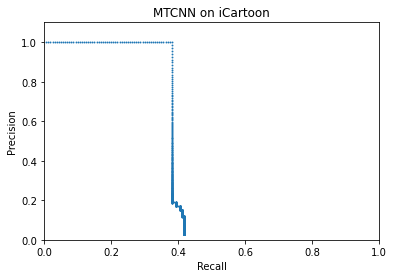

In [9]:
import matplotlib.pyplot as plt

plt.scatter(recallArr, precArr, s=0.8)
plt.xlim((0,1))
plt.ylim((0,1.1))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('MTCNN on iCartoon')
plt.show()

In [7]:
from sklearn import metrics
npRecallArr = np.array(recallArr)
npPrecArr = np.array(precArr)

idxs = np.argsort(npRecallArr)
AP = metrics.auc(npRecallArr[idxs], npPrecArr[idxs])
print('AP:', AP)

AP: 0.3793655033581807


[(288, 422, 67, 67), (518, 326, 67, 67), (432, 355, 67, 67), (374, 164, 164, 164)]
[0.9902795  0.99994445 0.99999988 1.        ]
personai_icartoonface_dettrain_50847.jpg
(1, 3, 0)


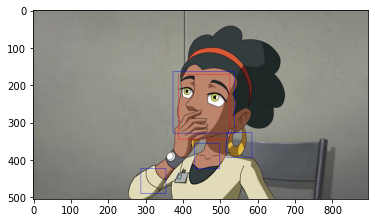

In [39]:
DATASET_DIR = '/Users/devon/Desktop/personai_icartoonface_dettrain/icartoonface_dettrain/'
img = results[60]
imgname = img.path[-40:]
img.path = DATASET_DIR + imgname
out_bboxes = []
out_confs = []
idxs = np.array(img.pred_conf) > 0.99
bboxes = np.array(img.pred_bboxes)
confs = np.array(img.pred_conf)
bboxes = bboxes[idxs]
confs = confs[idxs]
for bbox in range(len(bboxes)):
    out_bboxes.append((int(bboxes[bbox,0]), int(bboxes[bbox,1]), int(bboxes[bbox,2]), int(bboxes[bbox,3])))
    out_confs.append(confs[bbox])
img.pred_bboxes = out_bboxes
img.pred_conf = confs
print(img.pred_bboxes)
print(img.pred_conf)

print(imgname)
print(img.compute_metrics())
img.draw()